# Creating a Pivot Table

Pivot Tables are one of the most used features in Excel. You can point to a large table of data and interactively group the data and calculate multiple statistics on each of the groups and sub groups. Pandas makes it easy to do similar functionalities using the _pivot_table_ function. There are multiple options to achieve similar and even more powerful calculations with other Pandas functions, which we will cover later, however, _pivot_table_ is the most straight comparison to the one in Excel, and therefore, we will start with it

## Loading Data

As always, we will start with loading some data set (using the great tutorial from [pbpython](https://pbpython.com/pandas-pivot-table-explained.html))

In [1]:
import pandas as pd
# import numpy as np

sales_funnel = (
    pd
    .read_excel("https://pbpython.com/extras/sales-funnel.xlsx")
)

sales_funnel.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


## Simple Pivot Table

The simplest usage is to define what will be the index of the pivot table, which is equivalent to _Rows_ in Excel pivot table. All the numeric values will be added automatically and their **average** will be calculated.

In [2]:
(
    sales_funnel
    .pivot_table(index=["Name"])
)

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


## Multi-Index

We can define multiple columns as index and create a multi-index.

In [3]:
(
    sales_funnel
    .pivot_table(index=["Manager","Rep"])
)

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

## Choosing Values

The _Account_ number is also a numeric column, however, it is not relevant for us to look at in the pivot table, and the same goes for the _Quantity_ column. Therefore, we can choose to take only the _Price_ column for our pivot table.

In [4]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"]
    )
)

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

## Chossing aggregation function

We want to see the sum of the sales of each sales rep and not the average size of the sales. Let's request to use the _sum_ as the aggregation function. Other functions are _mean_ (default), _median_ _count_, _min_, _max_, _var_, _std_, and _prod_

In [18]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"],
        aggfunc='sum'
    )
)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

## Choosing Columns

The _Columns_ selection in Excel is similar to the one in pivot table in Pandas. We can add a breakdown of the sales per product, by adding it as the _Columns_ of the pivot table

In [6]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"],
        columns=["Product"],
        aggfunc='sum'
    )
)

NameError: name 'np' is not defined

## Removing Null (NaN) values

To make the table cleaner we can replace all the NaN values with 0

In [8]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"],
        columns=["Product"],
        aggfunc='sum',
        fill_value=0
    )
)

Price                             
Product                         CPU Maintenance Monitor Software
Manager       Rep                                               
Debra Henley  Craig Booker    65000        5000       0    10000
              Daniel Hilton  105000           0       0    10000
              John Smith      35000        5000       0        0
Fred Anderson Cedric Moss     95000        5000       0    10000
              Wendy Yule     165000        7000    5000        0

We can add more values such as _Quantity_

In [10]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price","Quantity"],
        columns=["Product"],
        aggfunc='sum',
        fill_value=0
    )
)

Price                              Quantity  \
Product                         CPU Maintenance Monitor Software      CPU   
Manager       Rep                                                           
Debra Henley  Craig Booker    65000        5000       0    10000        2   
              Daniel Hilton  105000           0       0    10000        4   
              John Smith      35000        5000       0        0        1   
Fred Anderson Cedric Moss     95000        5000       0    10000        3   
              Wendy Yule     165000        7000    5000        0        7   

                                                          
Product                     Maintenance Monitor Software  
Manager       Rep                                         
Debra Henley  Craig Booker            2       0        1  
              Daniel Hilton           0       0        1  
              John Smith              2       0        0  
Fred Anderson Cedric Moss             1       0        1  
              Wendy Yule              3       2        0

## Showing Totals

The default pivot table in Pandas is not showing the totals of the columns or rows, however, we can add it with _margins=True_. It will add _All_ both for the columns at the bottom and for the rows on the right.

In [11]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"],
        columns=["Product"],
        aggfunc='sum',
        fill_value=0,
        margins=True
    )
)

Price                                     
Product                         CPU Maintenance Monitor Software     All
Manager       Rep                                                       
Debra Henley  Craig Booker    65000        5000       0    10000   80000
              Daniel Hilton  105000           0       0    10000  115000
              John Smith      35000        5000       0        0   40000
Fred Anderson Cedric Moss     95000        5000       0    10000  110000
              Wendy Yule     165000        7000    5000        0  177000
All                          465000       22000    5000    30000  522000

## Visualize the pivot table

we can see the values in a graph

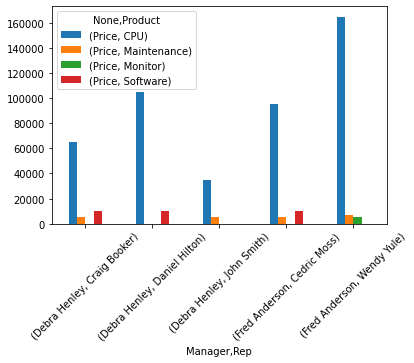

In [12]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"],
        columns=["Product"],
        aggfunc='sum',
        fill_value=0
    )
    .plot(
        kind='bar', 
        rot=45
    )
);

## Multiple Aggregation Functions

You can define multiple Aggregation functions for a value or different Aggregation functions for different values. You can either pass an array of function or a dictionary for different columns.

In [19]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price","Quantity"],
        columns=["Product"],
        aggfunc={ 
            "Price" :['sum','median'],
            "Quantity" : 'sum'
        },
        fill_value=0
    )
)

Price                                       \
                            median                                  sum   
Product                        CPU Maintenance Monitor Software     CPU   
Manager       Rep                                                         
Debra Henley  Craig Booker   32500        5000       0    10000   65000   
              Daniel Hilton  52500           0       0    10000  105000   
              John Smith     35000        5000       0        0   35000   
Fred Anderson Cedric Moss    47500        5000       0    10000   95000   
              Wendy Yule     82500        7000    5000        0  165000   

                                                         Quantity              \
                                                              sum               
Product                     Maintenance Monitor Software      CPU Maintenance   
Manager       Rep                                                               
Debra Henley  Craig Booker         5000       0    10000        2           2   
              Daniel Hilton           0       0    10000        4           0   
              John Smith           5000       0        0        1           2   
Fred Anderson Cedric Moss          5000       0    10000        3           1   
              Wendy Yule           7000    5000        0        7           3   

                                              
                                              
Product                     Monitor Software  
Manager       Rep                             
Debra Henley  Craig Booker        0        1  
              Daniel Hilton       0        1  
              John Smith          0        0  
Fred Anderson Cedric Moss         0        1  
              Wendy Yule          2        0

## Format the values

A pivot table is simply a dataframe in Pandas and you can format the values similar to the formating of any other dataframe. We will cover Styling in a dedicated section, however, here is a quick preview to formating the the _Price_ column as currency

In [20]:
(
    sales_funnel
    .pivot_table(
        index=["Manager","Rep"], 
        values=["Price"],
        aggfunc='sum',
        fill_value=0
    )
    .style
    .format({'Price':'${0:,.0f}'})
)